# Question 8
## How does ordinally encoding the categorical response and feature variables affect the output in Linear regression? 

### Context:

<b>We have two questions to handle -</b>
<ol>
    <li>Suppose a response variable with 3 unordered classes is ordinally encoded (1,2,3,...). Does the model output differ as the class-number mapping is varied?</li>
    <li>Does a similar effect arise when categorical feature variables are ordinally encoded?</li>
    </ol>
We will conduct an empirical study to answer the above questions.

### Strategy:

<b>Query 1</b>

We will take input $x$ uniformly distributed over a range and three probability distributions - $Pr(Y=1|X)$, $Pr(Y=2|X)$ and $Pr(Y=3|X)$ respectively - such that $\sum_{i=1}^{3} {Pr(Y=i|X=x_0)} = 1$. Let us call these distributions $p_1(x)$, $p_2(x)$ and $p_3(x)$ respectively.

Based on these distributions we will generate the following sequences -
<ul>
    <li>$X_{train}$</li>
    <li>three sequences $p_i(X)$ for each of the three classes</li>
    <li>$Y_{train}$ based on the three sequences $p_i(X)$</li>
    <li>$X_{test}$</li>
    </ul>

A <i>Linear Regression</i> model will be fit to this data set $(X_{train},Y_{train})$ and will be used to predict the set $(X_{test},Y_{testPredict})$. The predictions will be converted to their class labels (via colour-coding in plots).

This same scheme will be repeated after changing the class-number mapping and the two sets of predictions will be compared to find the effect.

### Generating the sequnces:
#### $X_{train}$, $p_1(X_{train})$, $p_2(X_{train})$, $p_3(X_{train})$, $Y_{train}$ and $X_{test}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import scipy

In [2]:
X_train = np.random.uniform(low=-1.0, high=7.0,size=300)

In [3]:
p1 = scipy.stats.norm(loc=1.0,scale=1.0).pdf
p2 = scipy.stats.norm(loc=3.0,scale=1.0).pdf
p3 = scipy.stats.norm(loc=5.0,scale=1.0).pdf

In [4]:
p1_train = p1(X_train)
p2_train = p2(X_train)
p3_train = p3(X_train)

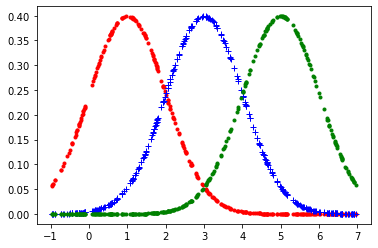

In [5]:
plt.plot(X_train,p1_train,'.r')
plt.plot(X_train,p2_train,'+b')
plt.plot(X_train,p3_train,'.g');

In [6]:
P_train = np.array([p1_train,p2_train,p3_train]).T

The columns of P_train are $p_1(X_{train})$, $p_2(X_{train})$ and $p_3(X_{train})$ respectively. However for each $x$, $p_1(x)+p_2(x)+p_3(x)$ should equal 1. Hence we normalize each row of P_train so that they sum up to 1.0. 

In [7]:
P_train = P_train/np.linalg.norm(P_train,ord=1,axis=1).reshape(P_train.shape[0],1)

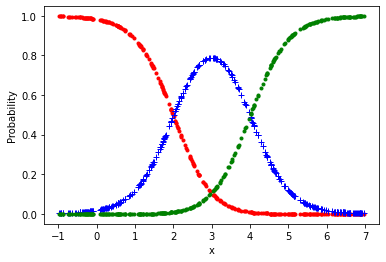

In [8]:
plt.plot(X_train,P_train[:,0],'.r')
plt.plot(X_train,P_train[:,1],'+b')
plt.plot(X_train,P_train[:,2],'.g')
plt.xlabel('x')
plt.ylabel('Probability');
#plt.savefig('Distribution of classes');

The above diagram now displays the true probabilities for each class at any given $x$ that we will be using to generate the sequence $Y_{train}$.

For generating $Y_{train}$ we decide upon the number-class label mapping. Also we decide the class-label to colour mapping to be used for plotting.
<ul>
    <li>class 1 - mostly present in left $x$ region will be encoded as 1 with colour red</li>
    <li>class 2 - mostly present in mid $x$ region will be encoded as 2 with colour blue</li>
    <li>class 3 - mostly present in right $x$ region will be encoded as 3 with colour green</li>
</ul>

Later classes 1, 2 and 3 will be mapped to integers 2, 1 and 3 respectively. The colour mapping will remain the same - RGB.

In [9]:
Y_train = np.array([np.random.choice([1,2,3],p=p) for p in P_train])

In [10]:
Y_train

array([1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 1, 1, 3, 1, 3, 2, 1,
       1, 3, 1, 1, 1, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 1,
       1, 3, 3, 2, 3, 1, 3, 1, 1, 3, 2, 1, 1, 1, 2, 2, 3, 1, 1, 1, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 2, 1, 3, 1, 3,
       3, 3, 1, 3, 2, 3, 2, 1, 2, 3, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3, 3,
       3, 3, 2, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 2, 2, 3, 1, 3, 1, 3,
       1, 3, 3, 3, 1, 3, 1, 3, 2, 3, 2, 1, 3, 2, 2, 1, 3, 1, 1, 2, 3, 1,
       3, 1, 1, 3, 2, 3, 3, 1, 3, 2, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1,
       3, 2, 2, 1, 3, 3, 1, 3, 2, 2, 2, 3, 2, 3, 1, 3, 3, 1, 2, 1, 2, 1,
       3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 2, 2, 1, 3, 1, 1, 3,
       1, 1, 3, 3, 2, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3,
       3, 2, 1, 3, 2, 2, 3, 2, 1, 1, 2, 1, 1, 2, 3, 3, 1, 2, 2, 3, 2, 1,
       2, 3, 2, 3, 3, 2, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3, 1, 3, 3, 1,
       2, 3, 1, 3, 3, 2, 2, 3, 2, 3, 2, 3, 1, 2])

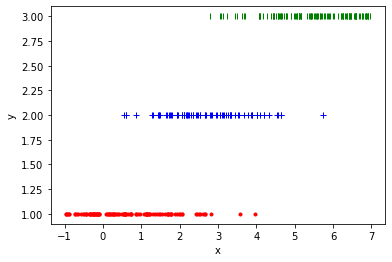

In [11]:
plt.plot(X_train[Y_train==1],Y_train[Y_train==1],'.r')
plt.plot(X_train[Y_train==2],Y_train[Y_train==2],'+b')
plt.plot(X_train[Y_train==3],Y_train[Y_train==3],'|g')
plt.xlabel('x')
plt.ylabel('y');
#plt.savefig('Training set')


In [12]:
X_test = np.random.uniform(low=-1.0, high=7.0,size=150)

### Fitting Linear Regression and predicting $Y_{testPredict}$

In [13]:
reg = LinearRegression()

In [14]:
reg.fit(X_train.reshape(-1,1),Y_train)

LinearRegression()

In [15]:
Y_test = reg.predict(X_test.reshape(-1,1))

In [16]:
Y_testClass = np.rint(Y_test)

In [17]:
Y_testClass

array([1., 2., 3., 1., 3., 2., 1., 3., 2., 2., 3., 2., 1., 1., 3., 3., 1.,
       2., 3., 1., 3., 1., 1., 3., 2., 3., 3., 1., 1., 1., 2., 3., 2., 1.,
       3., 3., 1., 1., 1., 2., 1., 1., 2., 1., 1., 3., 1., 2., 1., 3., 1.,
       1., 1., 3., 3., 1., 3., 1., 2., 3., 3., 3., 2., 1., 2., 1., 3., 1.,
       1., 1., 1., 3., 3., 3., 2., 1., 2., 1., 2., 3., 1., 3., 3., 1., 2.,
       1., 1., 2., 2., 2., 1., 2., 1., 2., 3., 3., 3., 3., 2., 2., 1., 2.,
       2., 3., 3., 2., 2., 2., 2., 3., 1., 2., 1., 2., 2., 3., 1., 1., 3.,
       2., 3., 2., 1., 3., 3., 1., 3., 2., 2., 2., 2., 3., 1., 2., 1., 3.,
       2., 1., 2., 3., 2., 3., 2., 2., 1., 2., 1., 3., 3., 1.])

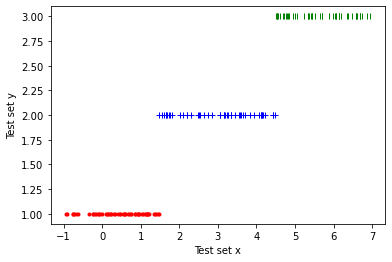

In [18]:
plt.plot(X_test[Y_testClass==1.0],Y_testClass[Y_testClass==1.0],'.r')
plt.plot(X_test[Y_testClass==2.0],Y_testClass[Y_testClass==2.0],'+b')
plt.plot(X_test[Y_testClass==3.0],Y_testClass[Y_testClass==3.0],'|g')
plt.xlabel('Test set x')
plt.ylabel('Test set y');
#plt.savefig('Test set predictions')


**The above figure correctly captures the class distribution, class-1(red) on left, class-2(blue) in the mid and class-3(green) at the right regions respectively.**

### Changing the class encodings

Everything above will remain the same except for the portion where the encoding is done i.e., $Y_{train}$ is generated from P_train.

In [19]:
Y_trainChanged = np.array([np.random.choice([2,1,3],p=p) for p in P_train])

In [20]:
Y_trainChanged

array([2, 2, 2, 2, 1, 2, 2, 3, 2, 2, 2, 3, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2,
       1, 1, 2, 2, 2, 3, 3, 3, 1, 3, 1, 3, 2, 2, 1, 2, 2, 1, 2, 1, 3, 1,
       2, 3, 3, 2, 3, 2, 3, 1, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 2, 2, 1, 2, 1,
       3, 3, 1, 3, 1, 3, 2, 1, 3, 1, 1, 2, 3, 2, 3, 2, 3, 1, 1, 1, 3, 3,
       1, 3, 2, 2, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 3, 1, 3, 1, 2, 3, 1, 3,
       2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 1, 2, 3, 2, 2, 2, 3, 2, 2, 1, 3, 2,
       1, 2, 2, 3, 3, 3, 3, 2, 3, 1, 2, 3, 1, 2, 3, 3, 1, 3, 3, 3, 2, 2,
       3, 2, 1, 2, 1, 3, 2, 3, 1, 1, 3, 3, 2, 3, 2, 3, 3, 2, 1, 2, 1, 2,
       3, 1, 2, 1, 2, 2, 2, 2, 1, 2, 3, 2, 2, 2, 1, 2, 3, 2, 3, 2, 2, 3,
       2, 2, 3, 3, 1, 2, 2, 2, 2, 3, 2, 2, 3, 2, 3, 3, 1, 1, 3, 2, 1, 1,
       1, 1, 2, 3, 1, 1, 3, 2, 2, 2, 1, 2, 2, 3, 3, 1, 2, 3, 1, 3, 1, 2,
       1, 3, 3, 3, 3, 3, 2, 2, 2, 1, 2, 3, 3, 2, 2, 2, 1, 3, 2, 3, 3, 3,
       1, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2])

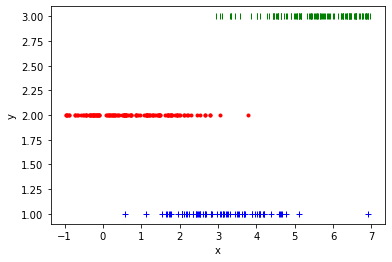

In [21]:
plt.plot(X_train[Y_trainChanged==2],Y_trainChanged[Y_trainChanged==2],'.r')
plt.plot(X_train[Y_trainChanged==1],Y_trainChanged[Y_trainChanged==1],'+b')
plt.plot(X_train[Y_trainChanged==3],Y_trainChanged[Y_trainChanged==3],'|g')
plt.xlabel('x')
plt.ylabel('y');
#plt.savefig('Training set modified')


In [22]:
regChanged = LinearRegression()

In [23]:
reg.fit(X_train.reshape(-1,1),Y_trainChanged)

LinearRegression()

In [24]:
Y_testChanged = reg.predict(X_test.reshape(-1,1))

In [25]:
Y_testChangedClass = np.rint(Y_testChanged)

In [26]:
Y_testChangedClass

array([2., 2., 3., 2., 3., 2., 2., 3., 2., 2., 3., 2., 2., 2., 3., 3., 2.,
       2., 3., 2., 3., 2., 2., 3., 2., 3., 3., 2., 1., 2., 2., 3., 2., 2.,
       3., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2.,
       2., 2., 3., 3., 2., 3., 2., 2., 3., 3., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 3., 3., 3., 2., 2., 2., 2., 2., 3., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2., 2., 3.,
       2., 3., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 1., 2., 2., 3.,
       2., 2., 2., 3., 2., 2., 2., 2., 2., 2., 2., 2., 3., 2.])

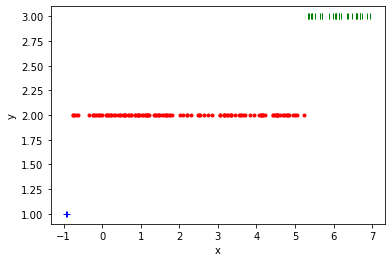

In [27]:
plt.plot(X_test[Y_testChangedClass==2.0],Y_testChangedClass[Y_testChangedClass==2.0],'.r')
plt.plot(X_test[Y_testChangedClass==1.0],Y_testChangedClass[Y_testChangedClass==1.0],'+b')
plt.plot(X_test[Y_testChangedClass==3.0],Y_testChangedClass[Y_testChangedClass==3.0],'|g')
plt.xlabel('x')
plt.ylabel('y');
#plt.savefig('Test set modified')


**The class distribution for this changed encoding scheme of classes 1(red), 2(blue) and 3(green) being encoded as 2,1 and 3 respectively leads to the predictions being completely off the target.**

### Do categorical feature variables show similar behaviour?

For this we will no longer go through the long process but rather describe it via a simple diagram. In doing so we will in fact discover the reason why ordinal encoding of categorical features might not work, be it on the response end or feature end.

Suppose we have a categorical feature variable with class-labels Red, Blue and Green respectively. The corresponding $Y$ values are 4, 5 and 6. The class-label to number mapping is - Red-1, Blue-2 and Green-3.

In [28]:
df = pd.DataFrame([['Red',1,4],['Blue',2,5],['Green',3,6]], columns=['X','XEncoded','Y'])
df

,X,XEncoded,Y
0,Red,1,4
1,Blue,2,5
2,Green,3,6


The data looks as below with the class-labels and data-point colours being the same for clarity.

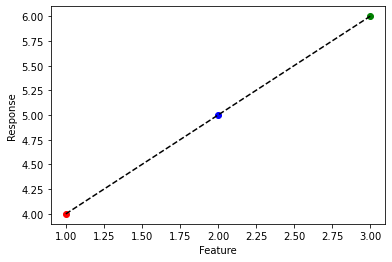

In [29]:
plt.plot(df['XEncoded'][0],df['Y'][0],'or')
plt.plot(df['XEncoded'][1],df['Y'][1],'ob')
plt.plot(df['XEncoded'][2],df['Y'][2],'og')
plt.plot(df['XEncoded'],df['Y'],'--k')
plt.xlabel('Feature')
plt.ylabel('Response');
#plt.savefig('Encoding 1')


It is obvious a linear regression would do well in this above setting.

Now suppose the class-label to number mapping was instead done as - Red-2, Blue-1 and Green-3. The data and figure now look like the following.

In [30]:
df = pd.DataFrame([['Red',2,4],['Blue',1,5],['Green',3,6]], columns=['X','XEncoded','Y'])
df

,X,XEncoded,Y
0,Red,2,4
1,Blue,1,5
2,Green,3,6


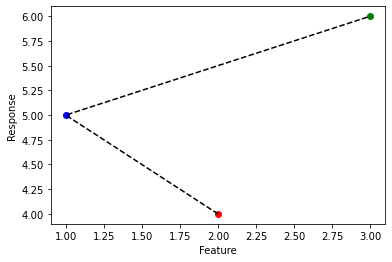

In [31]:
plt.plot(df['XEncoded'][0],df['Y'][0],'or')
plt.plot(df['XEncoded'][1],df['Y'][1],'ob')
plt.plot(df['XEncoded'][2],df['Y'][2],'og')
plt.plot(df['XEncoded'],df['Y'],'--k')
plt.xlabel('Feature')
plt.ylabel('Response');
#plt.savefig('Encoding 2')


A linear case becomes non-linear now and clearly linear regression will not be able to capture this. It is the same with feature and response. Changing the coding convention can introduce non-linearities.

Now to capture non-linearities we need our model to be more flexible. How is this flexibility achieved? Either our model itself is non-linear, for e.g., QDA, Decision Tree, Polynomial regression etc. Or we have more number of features in a linear model- this is the same as using OneHotEncoding for categorical variables while using Linear Regression (because a non-linearity in higher dimensions can become relatively more linear).

<b>Hence, when using linear models, encoding categorical variables ordinally might lead to issues (if you are unlucky enough to choose the bad coding convention which introduces a bad non-linearity even in a good linear model). Again introducing OneHotEncoding has the potential risk of exploding the number of features and hence leading to overfitting or destroying model interpretability. Thus in linear models there is a trade-off going on between the two where which scheme is better can be decided only through experimental runs. 

For non-linear models ordinal encoding might pass though because they have the inherent capability to capture non-linearities. Although even that should be tested by experimental runs because I don't think there is a general analytical proof present to cover all the different scenarios.</b>